In [1]:
import torch
from dataset_class import dataset,params2theta,theta2params
import dataset_class as dc
import pandas as pd
from matplotlib import pyplot as plt
from synth_data import cases

import numpy as np

In [2]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True,cutoff=300):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils,cutoff)

def rel_error(data,case):
    mus,sigs,rhos = data.ev
    rel_error = torch.abs(mus.cpu().reshape(-1,1)/case.mus-1)
    return torch.sum(rel_error.min(axis=1)[0]*rhos.cpu())

In [3]:
case = cases.case2
datapoints = 1000

# case = cases.case3
# datapoints = 400

In [4]:
filename = 'synth_data/synth_'+ case.name+ '.csv'
th_gt = params2theta(torch.tensor(case.mus),
                     torch.tensor(case.sigs),
                     torch.tensor(case.rhos))

In [5]:
data = load_dataset(filename,Nmax=datapoints,cutoff=case.cutoff)

In [6]:
data.loglike(th_gt.to(data.device),th_gt.size(0)//3).sum()


tensor(-3893.3996, device='cuda:0', dtype=torch.float64)

In [7]:
data.evaluate()

4.270278409449881 -3960.454946906128 -298.46260939906574
4.1020499165538435 -3890.5532282512863 -210.94770360521193
4.065781249529534 -3892.0900080048596 -173.4811601070142
4.054051269996006 -3893.8878976319775 -160.10999772197954


(tensor([ 4995.2887,  5000.0981,  1013.8922,  5005.1733,  5003.1068,  5012.3263,
         15430.1049, 15449.2236, 15215.4471, 15766.1222, 14968.4026, 15220.4188,
           925.7319,  4952.0347,  4949.5486,  1044.7324,  4887.7668, 14672.8402,
          4755.1384,  1003.1805, 14147.8062, 13606.2668, 13258.3508, 12566.3308,
          4164.7678], device='cuda:0', dtype=torch.float64),
 tensor([ 369.9295,  389.3203,  132.0387,  421.7374,  432.3854,  463.1364,
         1370.4759, 1432.3008, 1298.8629, 1790.5291, 1220.1978, 1522.7600,
          115.9841,  575.1636,  618.7106,  177.5227,  649.3412, 1625.1221,
          529.9136,  179.3608, 1801.6640, 1524.7534, 1544.9834, 1591.8009,
         1103.2302], device='cuda:0', dtype=torch.float64),
 tensor([0.1155, 0.1031, 0.0957, 0.0821, 0.0733, 0.0652, 0.0611, 0.0545, 0.0486,
         0.0429, 0.0383, 0.0338, 0.0302, 0.0248, 0.0217, 0.0203, 0.0166, 0.0153,
         0.0127, 0.0115, 0.0095, 0.0079, 0.0064, 0.0049, 0.0041],
        device='cuda:0', dt

/home/pessoa/Codes/CElegans-Plate/dataset_class.py:224: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels((ax.get_xticks()*bins[-1]).astype(int))


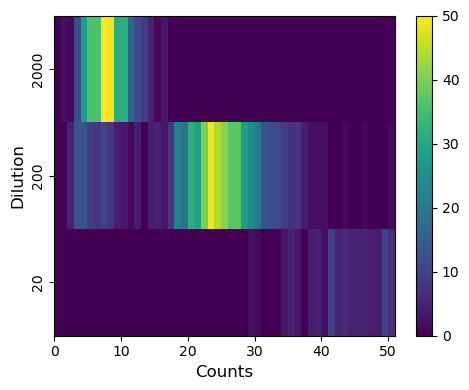

In [8]:
fig,ax = plt.subplots(1,figsize=(5,4))
data.dill_imshow(ax,fig)
plt.tight_layout()
plt.savefig('graphs/synth/fig3a.png',dpi=500)

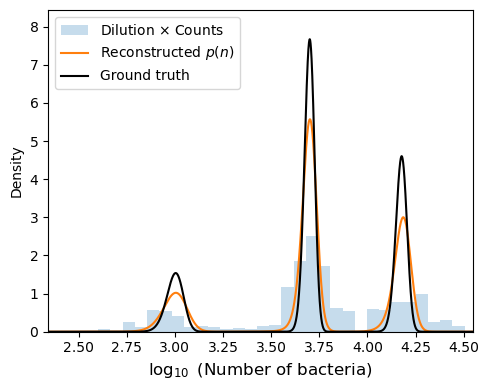

In [9]:
fig,ax = plt.subplots(1,figsize=(5,4))
data.log_plots(ax,th_gt)
plt.tight_layout()
plt.legend()
fig.savefig('graphs/synth/fig3b',dpi=500)

In [10]:
del data.lpkdil_n
#del data
print('Relative error', rel_error(data,case))

Relative error tensor(0.0170, dtype=torch.float64)


In [11]:
data_nocutoff = load_dataset(filename,Nmax=datapoints,cutoff=-1)
data_nocutoff.evaluate(tol=1e-5)

4.016954491118822 -3706.359944872608 -303.692963159019
3.8769058813209867 -3654.417808310483 -221.9759714270018
3.8349282322677807 -3654.086095821768 -180.586064456779
3.819351920729769 -3656.1179568001453 -163.16756627959302


(tensor([  872.9537,  5075.7888,  5078.1010,  5083.6662,  5082.6290,  5094.6990,
          5080.6615, 17567.4349, 17540.1410,  5085.9021, 17450.7967,  5081.6731,
         17357.6190,  5024.7133, 17195.7850,   856.4054,  5458.2186, 16844.1002,
         16566.3898, 16276.6236,  4672.5898,  7484.3997,  5620.0958,  4292.0593,
          1353.7407], device='cuda:0', dtype=torch.float64),
 tensor([  38.8869,  412.0751,  426.8333,  447.4207,  459.5776,  491.7790,
          488.8330, 1329.5280, 1391.0060,  552.7488, 1357.4557,  610.2738,
         1692.8675,  590.0535, 1752.7149,   87.6338, 1212.2093, 1720.0799,
         1931.3475, 2122.1620,  612.5568, 1663.8311, 1457.9087, 1158.5996,
          343.8882], device='cuda:0', dtype=torch.float64),
 tensor([0.1316, 0.1039, 0.0928, 0.0828, 0.0739, 0.0657, 0.0587, 0.0527, 0.0468,
         0.0412, 0.0371, 0.0320, 0.0285, 0.0251, 0.0221, 0.0199, 0.0162, 0.0148,
         0.0126, 0.0107, 0.0090, 0.0080, 0.0055, 0.0042, 0.0041],
        device='cuda:0', dt

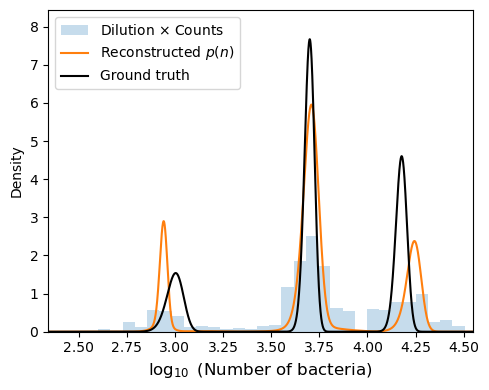

In [12]:
fig,ax = plt.subplots(1,figsize=(5,4))
data_nocutoff.log_plots(ax,th_gt)
plt.tight_layout()
plt.legend()
fig.savefig('graphs/synth/fig3c',dpi=500)

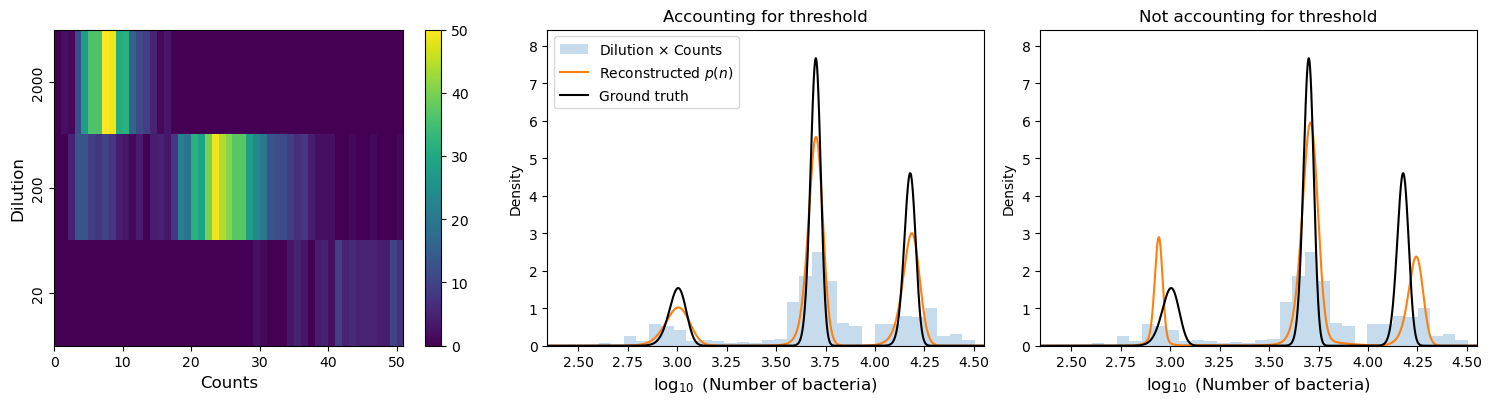

In [16]:
fig,ax = plt.subplots(1,3,figsize=(15,4))
data.dill_imshow(ax[0],fig)
data.log_plots(ax[1],th_gt)
data_nocutoff.log_plots(ax[2],th_gt)
plt.tight_layout()
ax[1].legend()
ax[1].set_title('Accounting for threshold',fontsize=12)
ax[2].set_title('Not accounting for threshold',fontsize=12)
fig.savefig('graphs/synth/'+case.name,dpi=500)